In [1]:
from comet_ml import Experiment

In [2]:
# Create an experiment with your api key
experiment = Experiment(
    api_key="yDx9qlAQYPtxMnLfZIisUuqkf",
    project_name="Lenguaje de senas",
    workspace="cmejia99",
    log_code=True)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/cmejia99/lenguaje-de-senas/e8c667b846d44b779958cc4c3c286d42



In [2]:
from classData import dataSet
from Modelos import models
from tensorflow.keras.optimizers import SGD #Stochastic Gradient Descent
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from matplotlib import pyplot as plt
import numpy as np
import time

In [3]:
##Se coloca 32 como tamaño de bacth porque se satura la GPU:
Data = dataSet(200,200,32)

Found 70725 files belonging to 24 classes.
Using 14145 files for training.
Found 70725 files belonging to 24 classes.
Using 7072 files for validation.


In [3]:
nombres_clases = Data.train_ts.class_names  ##Nombres de las clases
print("####Train####")
Data.train_ts = Data.Normalization(Data.train_ts)
print("####Test####")
Data.test_ts = Data.Normalization(Data.test_ts)
print(nombres_clases)


####Train####
Imagen Original 0.0 226.0
Imagen Escalada 0.0 0.97647065
####Test####
Imagen Original 0.0 246.0625
Imagen Escalada 0.0 0.9837843
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


In [ ]:
#####Se crean los vectores de entrenamiento y test######
X_train = []
Y_train = []
X_test = []
Y_test = []
inicio = time.time()
X_train,Y_train = Data.generated_vector_nw(Data.train_ts,X_train,Y_train)
X_train,Y_train = Data.list_to_numpy(X_train,Y_train)
X_test,Y_test = Data.generated_vector_nw(Data.test_ts,X_test,Y_test)
X_test,Y_test = Data.list_to_numpy(X_test,Y_test)
fin = time.time()
print((fin -inicio))

In [ ]:
Data.load_image_comet(experiment,X_train,Y_train,nombres_clases,'Train/')
Data.load_image_comet(experiment,X_test,Y_test,nombres_clases,'Test/')

In [3]:
Modelos = models(Data.width,Data.height,20)
Model_CNN  = Modelos.cnn_v1()

In [ ]:
#experiment.log_image(Data.train_ts, name='Images Train', overwrite=False, image_format="jpg")
#experiment.log_image(X_test, name='Images Test', overwrite=False, image_format="jpg")
# Report multiple hyperparameters using a dictionary:
hyper_params = {
    "learning_rate": 0.001,
    "momentum": 0.9,
    "batch_size": 32,
}
experiment.log_parameters(hyper_params)
hidden_layer_size = 1
experiment.log_parameter("hidden_layer_size", hidden_layer_size)


In [4]:
optimo= SGD(learning_rate=0.001, momentum =0.9)
Model_CNN = Modelos.Generated_model(Model_CNN,optimo)
Model_CNN.summary()    

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0     

In [ ]:
history, loss, acc = Modelos.execute_model(Model_CNN,Data.train_ts, Data.test_ts)
print("Loss:{0} - Accuracy:{1}".format(loss,acc))
print('> %.3f' % (acc*100.0))
Model_CNN.save('Modelos//Modelo_4.h5')

In [ ]:
Modelos.graphics(history,'Inicial')

In [ ]:
experiment.end()

In [ ]:
############Imagen de validación#################
example_ts = image_dataset_from_directory(directory='..\\Example\\', 
                                                labels='inferred', ##Etiquetas apartir del directorio.
                                                label_mode='categorical', ##Modo categorico.
                                                batch_size=1,
                                                image_size=(200, 200), ##Escala a este tamaño las imagenes.
                                                seed = 1,
                                                validation_split = 0.99, ##Porcentaje del tamaño del data set.
                                                subset = "validation")

img = example_ts.take(1)
for i in img:
    for j in i:        
        plt.axis("off")
        plt.gca().set_title("Letra A ")
        plt.imshow(j[0].numpy().astype("uint8"))
        break
plt.show()    

test_feat  = []
test_label = []
example_ts = Data.Normalization(example_ts)
test_feat,test_label = Data.generated_vector(example_ts,test_feat,test_label)
test_feat,test_label = Data.list_to_numpy(test_feat,test_label)
print(test_feat.shape,test_label.shape)

In [ ]:
new_model = keras.models.load_model('Modelos//Modelo_1.h5')
print(test_feat.shape)
new_predictions = new_model.predict(test_feat)
letra = np.argmax(new_predictions)
print('Modelo 1: Letra indicada por el modelo: ',nombres_clases[letra],'Probabilidad',new_predictions[0][letra])

In [5]:
Modelos = models(Data.width,Data.height,20)
Model_CNN2 = Modelos.cnn_v2()
optimo= SGD(learning_rate=0.001, momentum =0.9)
Model_CNN2 = Modelos.Generated_model_nogpu(Model_CNN2,optimo)
Model_CNN2.summary()    

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 100, 100, 64)      3692

In [7]:
history2, loss2, acc2 = Modelos.execute_model(Model_CNN2,Data.train_ts, Data.test_ts)
print("Loss:{0} - Accuracy:{1}".format(loss2,acc2))
print('> %.3f' % (acc2*100.0))
Model_CNN2.save('Modelos//Modelo_5_1.h5')

COMET WARNING: tensorflow datasets are not currently supported for gradient and activation auto-logging
COMET INFO: Ignoring automatic log_parameter('verbose') because 'keras:verbose' is in COMET_LOGGING_PARAMETERS_IGNORE


Epoch 1/20
2659/2659 [==============================] - 901s 337ms/step - loss: 3.1023 - accuracy: 0.0903 - val_loss: 3.0295 - val_accuracy: 0.1618
Epoch 2/20
2659/2659 [==============================] - 636s 239ms/step - loss: 2.8156 - accuracy: 0.1638 - val_loss: 2.5656 - val_accuracy: 0.2879
Epoch 3/20
 790/2659 [=======>......................] - ETA: 6:58 - loss: 2.5535 - accuracy: 0.2252

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2659/2659 [==============================] - 631s 237ms/step - loss: 1.7144 - accuracy: 0.4377 - val_loss: 1.0347 - val_accuracy: 0.6908
Epoch 5/20
2659/2659 [==============================] - 634s 238ms/step - loss: 1.2718 - accuracy: 0.5691 - val_loss: 0.7315 - val_accuracy: 0.7800
Epoch 6/20
2659/2659 [==============================] - 634s 238ms/step - loss: 1.0088 - accuracy: 0.6523 - val_loss: 0.5246 - val_accuracy: 0.8386
Epoch 7/20
2659/2659 [==============================] - 632s 238ms/step - loss: 0.8196 - accuracy: 0.7181 - val_loss: 0.4153 - val_accuracy: 0.8681
Epoch 8/20
2659/2659 [==============================] - 627s 236ms/step - loss: 0.6951 - accuracy: 0.7596 - val_loss: 0.3001 - val_accuracy: 0.9140
Epoch 9/20
2659/2659 [==============================] - 627s 236ms/step - loss: 0.5939 - accuracy: 0.7960 - val_loss: 0.2603 - val_accuracy: 0.9283
Epoch 10/20
2659/2659 [==============================] - 627s 236ms/step - loss: 0.5119 - accuracy: 0.8259 - val_loss: 0.22

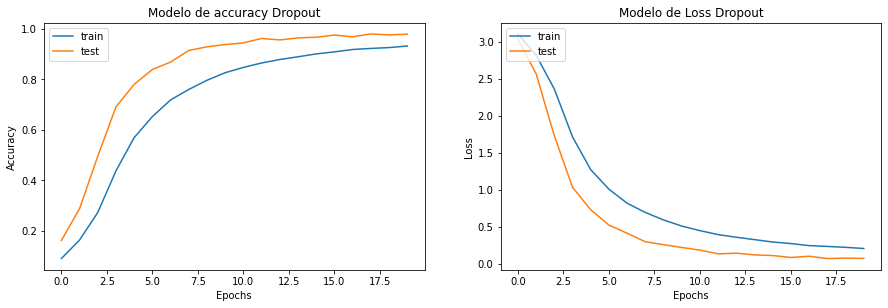

In [8]:
Modelos.graphics(history2,'Dropout')

In [9]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/cmejia99/lenguaje-de-senas/e8c667b846d44b779958cc4c3c286d42
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     accuracy [20]                  : (0.09029459208250046, 0.9314414858818054)
COMET INFO:     batch_accuracy [5320]          : (0.03125, 0.96875)
COMET INFO:     batch_loss [5320]              : (0.13264064490795135, 3.2261013984680176)
COMET INFO:     epoch_duration [20]            : (626.7189999999973, 900.8130000000092)
COMET INFO:     loss [20]                      : (0.20907825231552124, 3.102346658706665)
COMET INFO:     val_accuracy [20]              : (0.16176055371761322, 0.9793096780776978)
COMET INFO:     val_loss [20]                  : (0.0733238160610199, 3.0295398235321045)
COMET INFO:     validate_batch_accuracy [1340]

In [ ]:
new_model2 = keras.models.load_model('Modelos//Modelo_2.h5')
new_predictions2 = new_model2.predict(test_feat)
letra = np.argmax(new_predictions2)
print('Modelo 2: Letra indicada por el modelo: ',nombres_clases[letra],'Probabilidad',new_predictions[0][letra])


In [6]:
Modelos = models(Data.width,Data.height,20)
Model_CNN3 = Modelos.cnn_v3()
optimo= SGD(learning_rate=0.001, momentum =0.9)
Model_CNN3 = Modelos.Generated_model(Model_CNN3,optimo)
Model_CNN3.summary()    

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 64)        0   

In [7]:
history3, loss3, acc3 = Modelos.execute_model(Model_CNN3,Data.train_ts, Data.test_ts)
print("Loss:{0} - Accuracy:{1}".format(loss3,acc3))
print('> %.3f' % (acc3*100.0))
Model_CNN3.save('Modelos//Modelo_6.h5')

COMET WARNING: tensorflow datasets are not currently supported for gradient and activation auto-logging
COMET INFO: Ignoring automatic log_parameter('verbose') because 'keras:verbose' is in COMET_LOGGING_PARAMETERS_IGNORE


Epoch 1/20
1769/1769 [==============================] - 401s 224ms/step - loss: 2.9883 - accuracy: 0.1140 - val_loss: 2.4212 - val_accuracy: 0.321465 - ac - ETA: 56s - loss: 3.0435 - accura - ETA: 54s - loss: 3.0415 - accura - ETA: 52s - loss: 3.0393 - - ETA: 48s - loss: 3.0364  - ETA: 44s - loss: 3.0329 - accuracy: 0 - ETA: 43s - loss: 3.0315 - ac - ETA: 40s - loss: 3.0290 - accurac - ETA: 39s - loss: 3.0273 - - ETA: 26s - loss: 3.0131 - accuracy: 0. - ETA: 25s - loss: 3.0123 - accuracy: 0.10 - ETA: 24s - loss: 3.0120 - acc - ETA: 22s - loss: 3.0094 - accura - ETA: 19s - loss: 3.0080 - a - ETA: 16s - loss: 3.005 - ETA: 12s - loss: 3. - ETA: 8s - loss: 2.9976  - ETA - ETA: 2s - loss: 2.9911 - accuracy - ETA: 2s - loss: 2.9904 - ac - ETA: 0s - loss: 2.9885 - accuracy
Epoch 2/20
1769/1769 [==============================] - 397s 224ms/step - loss: 2.1681 - accuracy: 0.3413 - val_loss: 1.3226 - val_accuracy: 0.6333 loss: 2.220 - ETA: 42s - loss: 2.2155 - accuracy: 0.3 - ETA: 2s - loss: 2.1

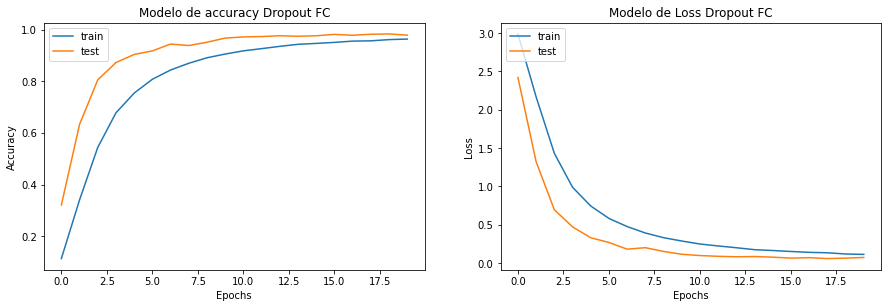

In [8]:
Modelos.graphics(history3,'Dropout FC')

In [9]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/cmejia99/lenguaje-de-senas/fe0014d02b4941d8aad7df66920e0c04
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     accuracy [20]                 : (0.11401555687189102, 0.9635207056999207)
COMET INFO:     batch_accuracy [3540]         : (0.03125, 1.0)
COMET INFO:     batch_loss [3540]             : (0.02550697699189186, 3.1814064979553223)
COMET INFO:     epoch_duration [20]           : (394.48399999999674, 400.9210000000021)
COMET INFO:     loss [20]                     : (0.11348889768123627, 2.9882779121398926)
COMET INFO:     val_accuracy [20]             : (0.3213856518268585, 0.9833863377571106)
COMET INFO:     val_loss [20]                 : (0.059186868369579315, 2.4212307929992676)
COMET INFO:     validate_batch_accuracy [900] : (0.25,

In [ ]:
Modelos = models(Data.width,Data.height,20)
Model_CNN3 = Modelos.cnn_v3()
optimo= SGD(learning_rate=0.001, momentum =0.9)
Model_CNN3 = Modelos.Generated_model_nogpu(Model_CNN3,optimo)
Model_CNN3.summary()    

In [ ]:
new_model3 = keras.models.load_model('Modelos//Modelo_3.h5')
new_predictions3 = new_model3.predict(test_feat)
letra = np.argmax(new_predictions3)
print('Modelo 3: Letra indicada por el modelo: ',nombres_clases[letra],'Probabilidad',new_predictions[0][letra])


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import cv2
import pickle
from sklearn.neural_network import MLPClassifier

In [5]:
##Se coloca 32 como tamaño de bacth porque se satura la GPU:
Data = dataSet(200,200,32)
#####Se crean los vectores de entrenamiento y test######
X_train = []
Y_train = []
X_test = []
Y_test = []
inicio = time.time()
X_train,Y_train = Data.generated_vector_nw(Data.train_ts,X_train,Y_train)
X_train,Y_train = Data.list_to_numpy(X_train,Y_train)
X_test,Y_test = Data.generated_vector_nw(Data.test_ts,X_test,Y_test)
X_test,Y_test = Data.list_to_numpy(X_test,Y_test)
fin = time.time()
print((fin -inicio))

Found 70725 files belonging to 24 classes.
Using 14145 files for training.
Found 70725 files belonging to 24 classes.
Using 7072 files for validation.
665.8048593997955


In [6]:
ds_Train = []
lb_Train = []
ds_Test = []
lb_Test = []
inicio = time.time()
Total_images_Train = X_train.shape[0]
Total_images_Test = X_test.shape[0]
print(Total_images_Train,Total_images_Test)
ds_Train,lb_Train = Data.generar_dataset(X_train,Y_train,ds_Train,lb_Train)
ds_Test,lb_Test = Data.generar_dataset(X_test,Y_test,ds_Test,lb_Test)
fin = time.time()
print('##########################################################')
print('Total tiempo generación características', (fin-inicio))
print('##########################################################')
print('Training',len(ds_Train),'label',len(lb_Train))
print('Testing',len(ds_Test),'label',len(lb_Test))

14145 7072
##########################################################
Total tiempo generación características 96.87714219093323
##########################################################
Training 14145 label 14145
Testing 7072 label 7072


In [7]:
###Se realiza un apilamiento de los descriptores de todas las imagenes:
inicio = time.time()
Pila_desc_tr = Data.apilamiento_descriptores(ds_Train)
Pila_desc_ts = Data.apilamiento_descriptores(ds_Test)
fin = time.time()
print('##########################################################')
print('Total tiempo apilamiento descriptores', (fin-inicio))
print('##########################################################')
print('Training',Pila_desc_tr.shape,'Test',Pila_desc_ts.shape)

##########################################################
Total tiempo apilamiento descriptores 771.1134774684906
##########################################################
Training (717626, 128) Test (358553, 128)


In [8]:
##Generamos el modelo de clustering con los descriptores:###
inicio = time.time()
clusters = 24 ###Valor lo dimos empiricamente.
cluster_kmeans = KMeans(n_clusters = clusters)
kmeans_model = cluster_kmeans.fit_predict(Pila_desc_tr)

##Se realiza el clustering sobre las imagenes de prueba:
kmeans_model_val = cluster_kmeans.predict(Pila_desc_ts)

pickle.dump(cluster_kmeans, open('Modelos//Kmeans.pkl', 'wb')) #Saving the model
#model = pickle.load(open('Modelos//Kmeans.pkl', 'rb')) #To load saved model from local directory
fin = time.time()
print('##########################################################')
print('Total tiempo entrenamiento cluster', (fin-inicio))
print('##########################################################')

##########################################################
Total tiempo entrenamiento cluster 166.280499458313
##########################################################


In [9]:
###Informacion del cluster generado:
print('Train Dimension cluster',kmeans_model.shape) ##Totdal de muestras
print('Train clusters',np.unique(kmeans_model,axis=0)) ##Total de clusters o grupos.

Train Dimension cluster (717626,)
Train clusters [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [10]:
histogram_Tr = Data.genera_histograma(clusters,Total_images_Train,ds_Train,kmeans_model)
histogram_Ts = Data.genera_histograma(clusters,Total_images_Test,ds_Test,kmeans_model_val)

(14145, 24)
##########################################################
Total tiempo generacion histograma 0.42905592918395996
##########################################################
(7072, 24)
##########################################################
Total tiempo generacion histograma 0.21043682098388672
##########################################################


In [11]:
x = np.arange(clusters)
y = np.array([abs(np.sum(histogram_Tr[:,h], dtype=np.int32)) for h in range(clusters)])
print(x)
print(y)
plt.bar(x, y)
plt.xlabel("Clustering de caracteristicas de imagenes")
plt.ylabel("Frecuencia")
plt.title("Complete Vocabulary Generated")
plt.xticks(x + 0.4, x)
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[35924 27569 16704 51162 29527 25662 48089 25725 22269 26276 26411 26220
 25972 22381 30483 14151 35490 29160 34471 31354 34629 45964 27991 24042]


In [12]:
###Se normaliza el histograma para evitar sesgos por variaciones pronunciadas:
scale = StandardScaler().fit(histogram_Tr)
pickle.dump(scale, open('Modelos//StandardScaler.pkl', 'wb'))
histogram_Tr = scale.transform(histogram_Tr)

histogram_Ts = scale.transform(histogram_Ts)

In [13]:
##Se construye el data set y los vectores de caracteristicas y etiquetas:
feat_train,labels_train,dataset_train = Data.procesamiento_datos (histogram_Tr,lb_Train)
print('pp',labels_train.shape)
print('Train','features',feat_train.shape,'Etiquetas',labels_train.shape,'dataset',dataset_train.shape)
feat_test,labels_test,dataset_test = Data.procesamiento_datos (histogram_Ts,lb_Test)
print('Test','features',feat_test.shape,'Etiquetas',labels_test.shape,'dataset',dataset_test.shape)

pp (14145, 24)
Train features (14145, 24) Etiquetas (14145, 24) dataset (14145, 48)
Test features (7072, 24) Etiquetas (7072, 24) dataset (7072, 48)


In [14]:
# Diseño del MLP 
alpha = [0.1,0.01,0.001, 0.0001]
momentum = [0.1,0.4,0.6,0.7,0.9]
i=0
x_predict = []
y_predict = []
for j in alpha:
    for n in momentum:
        inicio = time.time()
        mlp = MLPClassifier(hidden_layer_sizes=(256,128,64,32), activation='relu',
                            solver='adam', random_state=1, verbose = False, alpha=j, momentum=n).fit(feat_train,labels_train)
        y_pred = mlp.predict(feat_test)
        #pickle.dump(scale, open('Modelos//MLPClassifier.pkl', 'wb'))
        fin = time.time()
        print('##########################################################')        
        Train_accuracy = mlp.score(feat_train,labels_train)
        Test_accuracy = mlp.score(feat_test,labels_test)
        x_predict.append(Train_accuracy)
        y_predict.append(Test_accuracy)
        print('Total tiempo de entrenamiento alpha',j,n, (fin-inicio),Train_accuracy,Test_accuracy)    
        print('##########################################################')

##########################################################
Total tiempo de entrenamiento alpha 0.1 0.1 39.89229917526245 0.9710144927536232 0.4567307692307692
##########################################################
##########################################################
Total tiempo de entrenamiento alpha 0.1 0.4 39.893269777297974 0.9710144927536232 0.4567307692307692
##########################################################
##########################################################
Total tiempo de entrenamiento alpha 0.1 0.6 39.992005825042725 0.9710144927536232 0.4567307692307692
##########################################################
##########################################################
Total tiempo de entrenamiento alpha 0.1 0.7 40.649247884750366 0.9710144927536232 0.4567307692307692
##########################################################
##########################################################
Total tiempo de entrenamiento alpha 0.1 0.9 42.59404444694519 0.97

C:\Users\USUARIO\anaconda3\envs\server\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##########################################################
Total tiempo de entrenamiento alpha 0.001 0.1 41.05316710472107 0.999293036408625 0.4506504524886878
##########################################################


C:\Users\USUARIO\anaconda3\envs\server\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##########################################################
Total tiempo de entrenamiento alpha 0.001 0.4 41.11200976371765 0.999293036408625 0.4506504524886878
##########################################################


C:\Users\USUARIO\anaconda3\envs\server\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##########################################################
Total tiempo de entrenamiento alpha 0.001 0.6 41.0820894241333 0.999293036408625 0.4506504524886878
##########################################################


C:\Users\USUARIO\anaconda3\envs\server\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##########################################################
Total tiempo de entrenamiento alpha 0.001 0.7 41.37430739402771 0.999293036408625 0.4506504524886878
##########################################################


C:\Users\USUARIO\anaconda3\envs\server\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##########################################################
Total tiempo de entrenamiento alpha 0.001 0.9 40.901572465896606 0.999293036408625 0.4506504524886878
##########################################################
##########################################################
Total tiempo de entrenamiento alpha 0.0001 0.1 39.402583360672 0.9715093672675857 0.4468325791855204
##########################################################
##########################################################
Total tiempo de entrenamiento alpha 0.0001 0.4 39.352715730667114 0.9715093672675857 0.4468325791855204
##########################################################
##########################################################
Total tiempo de entrenamiento alpha 0.0001 0.6 39.38662600517273 0.9715093672675857 0.4468325791855204
##########################################################
##########################################################
Total tiempo de entrenamiento alpha 0.0001 0.7 39.390615224

In [15]:
print(x_predict)
print(y_predict)

[0.9710144927536232, 0.9710144927536232, 0.9710144927536232, 0.9710144927536232, 0.9710144927536232, 0.9987981618946624, 0.9987981618946624, 0.9987981618946624, 0.9987981618946624, 0.9987981618946624, 0.999293036408625, 0.999293036408625, 0.999293036408625, 0.999293036408625, 0.999293036408625, 0.9715093672675857, 0.9715093672675857, 0.9715093672675857, 0.9715093672675857, 0.9715093672675857]
[0.4567307692307692, 0.4567307692307692, 0.4567307692307692, 0.4567307692307692, 0.4567307692307692, 0.46097285067873306, 0.46097285067873306, 0.46097285067873306, 0.46097285067873306, 0.46097285067873306, 0.4506504524886878, 0.4506504524886878, 0.4506504524886878, 0.4506504524886878, 0.4506504524886878, 0.4468325791855204, 0.4468325791855204, 0.4468325791855204, 0.4468325791855204, 0.4468325791855204]


In [16]:
plt.figure(figsize=(30, 5))
plt.subplot(111)
plt.title("Análisis de Complejidad")
plt.plot(x_predict, label="Precisión entrenamiento")
plt.plot(y_predict, label="Precisión Validación")
plt.legend()

In [ ]:
experiment.log_metric("accuracy", x_predict)
experiment.log_metric("val_accuracy", y_predict)

In [ ]:
experiment.end()

In [ ]:
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, zca_epsilon=0.1, brightness_range=[0.1,0.8],
                            zoom_range=[0.8, 0.8]) #Hyperparaemtros del objeto generador
filenames = glob.glob('../DataSet/A/*') #Leyendo solo el subfolder A
for f in filenames:
  img = load_img(f)
  i2a = img_to_array(img)
  i2a = i2a.reshape((1, )+ i2a.shape)
  #print(i2a.shape)
  
  i=1
  
  #Generando 1 imagen por cada imagen original
  for batch in datagen.flow(i2a, batch_size=1,
                            save_to_dir ='../DataSet/A',
                            save_prefix='aug',
                            save_format ='jpg'):
    i=i+1
    if i > 2: #aqui puede cambiar el número de imágenes que usted desee generar por una original
      break
  #break 

In [ ]:
from classData import dataSet
Data = dataSet(200,200,32)

In [ ]:
##Data.data_augmentation('A')
##Data.data_augmentation('B')
#Data.data_augmentation('C')
#Data.data_augmentation('D')
#Data.data_augmentation('E')
#Data.data_augmentation('F')
#Data.data_augmentation('G')
#Data.data_augmentation('H')
#Data.data_augmentation('I')
#Data.data_augmentation('K')
#Data.data_augmentation('L')
#Data.data_augmentation('M')
#Data.data_augmentation('N')
#Data.data_augmentation('O')
#Data.data_augmentation('P')
#Data.data_augmentation('Q')
#Data.data_augmentation('R')
#Data.data_augmentation('S')
#Data.data_augmentation('T')
#Data.data_augmentation('U')
#Data.data_augmentation('V')
#Data.data_augmentation('W')
#Data.data_augmentation('X')
Data.data_augmentation('Y')